In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('Boston.csv')
#df['Unnamed: 0']

In [12]:
# Fitting using statsmodels
#mod = sm.OLS(df['medv'], df['lstat'])
mod = smf.ols(formula='medv ~ lstat', data=df)  #Another way of doing it. 
lm1 = mod.fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           5.08e-88
Time:                        11:41:18   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| [0.025000000000000001 0.97499999999999998]
-------------------------------------------------------------------------------------------------
Intercept     

In [6]:
## Fitting using using skl
feature_cols = ['lstat']
X = df[feature_cols]
y = df['medv']
lm2 = LinearRegression().fit(X,y)

Obtaining various statistics using skl or sm or both
    1. Coefficients
    2. Interecept
    3. P values of the coefficients
    4. Confidence intervals
    5. R-Squared
    6. Predicted values
    7. Residuals
It seems like skl does not do well in hypothesis testing. It is giving co-efficient and r2 but not p-values or confidence intervals. 

In [29]:
#Coefficients and intercpet
print(lm1.params)
print("Intercept : {}".format(lm2.intercept_))
print("Coefficients : {}".format(lm2.coef_))
#list(zip(feature_cols, lm2.coef_))
print('-'*80)    

#Pvalues and confidence intervals
print(lm1.pvalues)
print(lm1.conf_int()) #This gives 90% confidence interval
print('-'*80)

#R-Squared
print("R-Squared : {}".format(lm1.rsquared))
print("Score(R-square) : {}".format(lm2.score(X,y)))
print('-'*80)

#Prediction
X_new = pd.DataFrame({'lstat': [50]})
print(lm1.predict(X_new))
print(lm2.predict(X_new.values))
print('-'*80)
y_hat1 = lm1.predict(X)
r1 = y-y_hat1
r1 = np.round(r1, 2)
print("Mean of residuals : {}".format(np.mean(r1)))

#Residuals
y_hat2 = lm2.predict(X)
r2 = y-y_hat2
r2 = np.round(r2, 2)
print("Mean of residuals : {}".format(np.mean(r2)))
print("Standard deviation of residuals : {}".format(np.std(r)))

Intercept    34.553841
lstat        -0.950049
dtype: float64
Intercept : 34.553840879383095
Coefficients : [-0.95004935]
--------------------------------------------------------------------------------
Intercept    3.743081e-236
lstat         5.081103e-88
dtype: float64
                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951
--------------------------------------------------------------------------------
R-Squared : 0.54414629758647948
Score(R-square) : 0.5441462975864797
--------------------------------------------------------------------------------
0   -12.948627
dtype: float64
[-12.94862681]
--------------------------------------------------------------------------------
Mean of residuals : -5.9288537549465531e-05
Mean of residuals : -5.9288537549465531e-05
Standard deviation of residuals : 6.2034641314264203


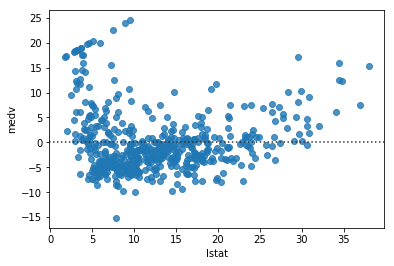

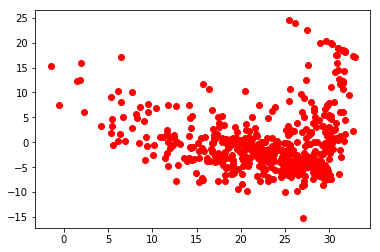

27.067451971770126
-15.17
(array([505], dtype=int32),)
505    27.067452
dtype: float64
505   -15.167452
dtype: float64


In [48]:
## Residual plot using seaborn
sns.residplot(df['lstat'], df['medv'])
plt.show()

## Residual plot manually
plt.plot(y_hat1, r1, 'ro')
plt.show()

print(y_hat1[505])
print(r1[505])

index = np.where(r1 < -10)
print(index)
print(lm1.predict(X.iloc[505]))
print(y[505] - lm1.predict(X.iloc[505]))